<a href="https://colab.research.google.com/github/Soares-remootFR/Analisando_Imoveis.1-Python-/blob/main/Case_1_Aluguel_de_Casas_(F%C3%A1bio_Soares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consultoria de Aluguel de Imóveis.**

- Meta:
  
  *   Achar o melhor custo benefício para a locação
      de um imóvel entre as cidades do Porto em
      Portugal e Barcelona na Espanha.
- Critérios:

  *   Escolhendo imóveis que estão de
      acordo com as necessidades e exigências do cliente.

* A Coleta de Dados:
  - Utilizando base de dados em formato xlsx;
  - Visualização dos dados;
  - Limpeza e tratarmento dos dados;
  - Análise descritiva para se chegar ao melhor custo
     benefício
     de um imóvel.


In [34]:
import pandas as pd

In [35]:
aluguel_casa = pd.read_excel("/content/houses_rent.xlsx")

In [36]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [37]:
aluguel_casa.tail()

,index,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
6075,6075,Barcelona,50,2,1,1,2,accept,not furnished,420,1150,0,15,1585
6076,6076,Barcelona,84,2,2,1,16,not accept,furnished,768,2900,63,37,3768
6077,6077,Porto,48,1,1,0,13,accept,not furnished,250,950,42,13,1255
6078,6078,Barcelona,160,3,2,2,-,not accept,not furnished,0,3500,250,53,3803
6079,6079,Barcelona,60,2,1,1,4,accept,furnished,489,1900,0,25,2414


In [38]:
aluguel_casa = aluguel_casa.rename(columns={"parking spaces":"parking_spaces", "rent amount":"rent_amount", "property tax":"property_tax", "fire insurance":"fire_insurance" })

In [39]:
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000,1000,121,9121
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820,122,11,1493
2,2,Barcelona,443,5,5,4,3,accept,furnished,4172,7000,1417,89,12680
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250,150,16,2116
4,4,Barcelona,19,1,1,0,-,not accept,not furnished,0,1200,41,16,1257


In [40]:
aluguel_casa.dtypes

index              int64
city              object
area               int64
rooms              int64
bathroom           int64
parking_spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent_amount        int64
property_tax       int64
fire_insurance     int64
total              int64
dtype: object

In [41]:
aluguel_casa = aluguel_casa.astype({"rent_amount":"float","property_tax":"float", "fire_insurance":"float", "total":"float" })

In [42]:
aluguel_casa.dtypes

index               int64
city               object
area                int64
rooms               int64
bathroom            int64
parking_spaces      int64
floor              object
animal             object
furniture          object
hoa                object
rent_amount       float64
property_tax      float64
fire_insurance    float64
total             float64
dtype: object

In [43]:
aluguel_casa.head(2)

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,Barcelona,240,3,3,4,-,accept,furnished,600,8000.0,1000.0,121.0,9121.0
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0


In [44]:
aluguel_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6080 non-null   int64  
 1   city            6080 non-null   object 
 2   area            6080 non-null   int64  
 3   rooms           6080 non-null   int64  
 4   bathroom        6080 non-null   int64  
 5   parking_spaces  6080 non-null   int64  
 6   floor           6080 non-null   object 
 7   animal          6080 non-null   object 
 8   furniture       6080 non-null   object 
 9   hoa             6080 non-null   object 
 10  rent_amount     6080 non-null   float64
 11  property_tax    6080 non-null   float64
 12  fire_insurance  6080 non-null   float64
 13  total           6080 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 665.1+ KB


In [45]:
aluguel_casa[["area", "rooms", "bathroom", "parking_spaces", "rent_amount", "property_tax", "fire_insurance", "total"]].describe()

,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,4395.844408,490.533224,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,3576.668946,6212.549484,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,1800.000000,34.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,45000.000000,366300.000000,677.000000,372700.000000


In [46]:
aluguel_casa = aluguel_casa[(aluguel_casa["total"]<= 4000) & (aluguel_casa["animal"]== "accept")]
# Outra forma de realizar o código acima é usar a funçaõ query:
# aluguel_casa = aluguel_casa.query("total <=4000 and animal == 'accept' ")
aluguel_casa.head(2)

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0


In [47]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,3018.996234,84.751412,1.989171,1.494350,0.997175,1911.903013,84.444915,24.906780,2462.879002
std,1755.395338,279.715184,0.831762,0.726632,0.989817,717.540684,100.490246,11.076311,822.479019
min,1.000000,10.000000,1.000000,1.000000,0.000000,420.000000,0.000000,3.000000,677.000000
25%,1453.500000,49.000000,1.000000,1.000000,0.000000,1348.250000,0.000000,17.000000,1810.000000
50%,3025.000000,65.000000,2.000000,1.000000,1.000000,1831.000000,55.000000,23.000000,2469.500000
75%,4533.250000,90.000000,3.000000,2.000000,1.000000,2400.000000,125.250000,31.000000,3085.500000
max,6079.000000,12732.000000,6.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,4000.000000


In [48]:
aluguel_casa = aluguel_casa[(aluguel_casa["total"]<= 4000) & (aluguel_casa["animal"]== "accept") & ((aluguel_casa["rooms"]==2) | (aluguel_casa["rooms"]==3))]
# Outra forma de realizar o código acima é usar a funçaõ query:
# aluguel_casa = aluguel_casa.query(("total <=4000 and animal == 'accept' and rooms == 2 or rooms == 3 "))
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
3,3,Barcelona,73,2,2,1,12,accept,not furnished,700,1250.0,150.0,16.0,2116.0
7,7,Barcelona,55,2,2,1,2,accept,not furnished,600,1300.0,67.0,17.0,1984.0
8,8,Barcelona,82,3,1,1,3,accept,furnished,828,2000.0,109.0,26.0,2963.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0


In [49]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,3003.132907,100.432836,2.379531,1.653873,1.212509,1964.006397,95.678749,25.899787,2556.358209
std,1739.608911,340.999109,0.485443,0.745034,0.973862,692.152422,107.359160,11.078694,783.028975
min,1.000000,30.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1453.000000,60.000000,2.000000,1.000000,1.000000,1445.500000,1.500000,17.000000,1962.500000
50%,3001.000000,76.000000,2.000000,2.000000,1.000000,1900.000000,67.000000,25.000000,2507.000000
75%,4518.500000,100.000000,3.000000,2.000000,2.000000,2450.000000,144.000000,32.000000,3181.500000
max,6079.000000,12732.000000,3.000000,6.000000,8.000000,3915.000000,791.000000,59.000000,3998.000000


In [50]:
agg_city_price = aluguel_casa.groupby(["city"])["total"].agg("mean").reset_index()
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


In [51]:
agg_bath_romm_price = aluguel_casa.groupby(["bathroom", "rooms"])["total"].agg("mean").reset_index()
agg_bath_romm_price

,bathroom,rooms,total
0,1,2,2091.175221
1,1,3,2542.509091
2,2,2,2734.612903
3,2,3,2928.720395
4,3,2,3057.440000
5,3,3,3217.704545
6,4,2,3136.000000
7,4,3,3461.133333
8,5,3,3245.000000
9,6,3,3101.000000


In [52]:
import seaborn as sns


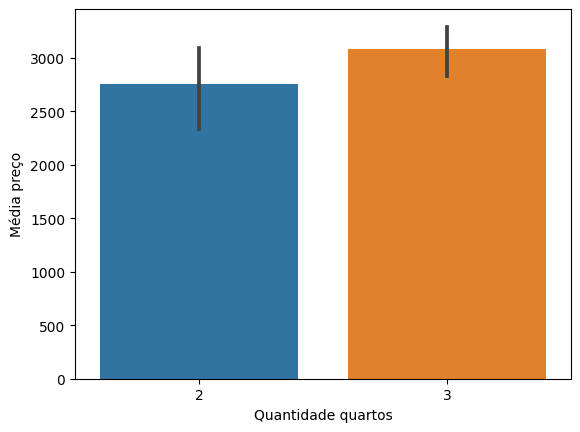

In [53]:
ax = sns.barplot(data=agg_bath_romm_price, x = "rooms", y = "total");
ax.set(xlabel = "Quantidade quartos", ylabel = "Média preço");

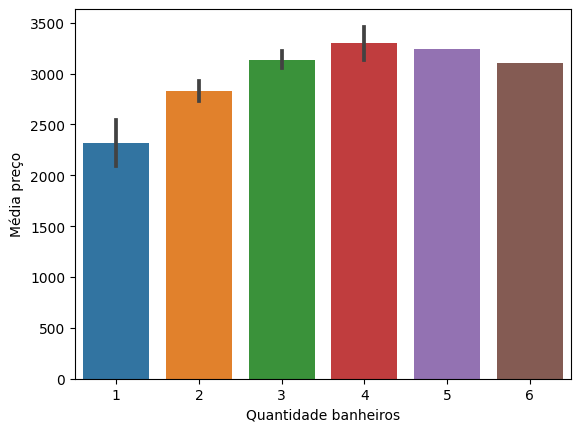

In [54]:
ax = sns.barplot(data=agg_bath_romm_price, x = "bathroom", y = "total");
ax.set(xlabel = "Quantidade banheiros", ylabel = "Média preço");

In [55]:
agg_area = aluguel_casa[["area"]]

In [56]:
agg_area = agg_area.query("area <= 100")

In [57]:
agg_area.describe()

,area
count,1064.000000
mean,69.641917
std,15.962461
min,30.000000
25%,57.000000
50%,69.000000
75%,80.000000
max,100.000000


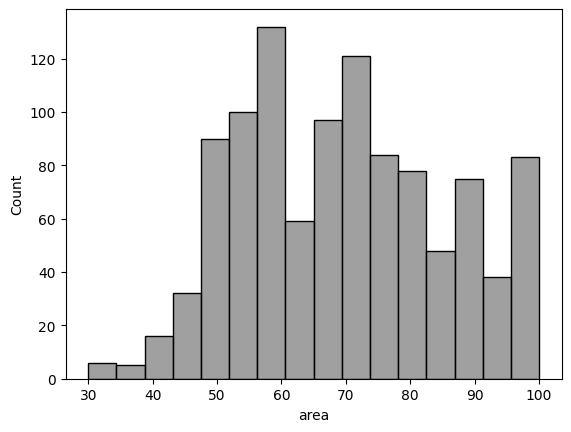

In [58]:
sns.histplot(data= agg_area, x="area", color= "gray");

In [59]:
agg_city_price

,city,total
0,Barcelona,2683.503759
1,Porto,2161.947522


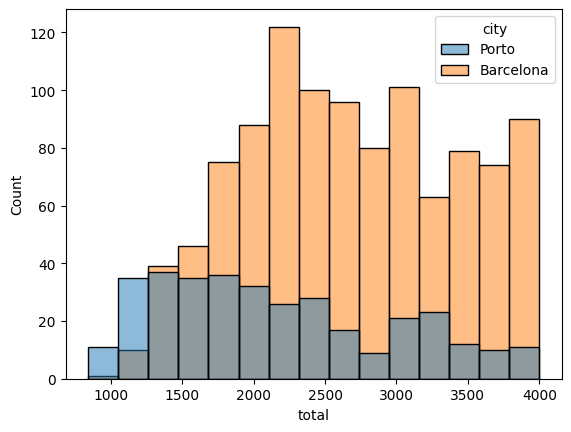

In [60]:
sns.histplot(data= aluguel_casa, x= "total", hue= "city");

In [61]:
aluguel_casa = aluguel_casa.query("city == 'Porto'")
aluguel_casa.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1,1,Porto,64,2,1,1,10,accept,not furnished,540,820.0,122.0,11.0,1493.0
15,15,Porto,56,2,1,1,1,accept,not furnished,345,950.0,11.0,13.0,1319.0
16,16,Porto,188,2,3,8,-,accept,not furnished,0,3010.0,584.0,46.0,3640.0
28,28,Porto,150,3,2,2,13,accept,not furnished,1370,1800.0,250.0,23.0,3443.0
36,36,Porto,94,3,3,2,1,accept,not furnished,750,2200.0,192.0,28.0,3170.0


In [62]:
aluguel_casa.describe()

,index,area,rooms,bathroom,parking_spaces,rent_amount,property_tax,fire_insurance,total
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,2984.862974,128.889213,2.481050,1.597668,1.381924,1568.731778,91.655977,21.166181,2161.947522
std,1765.093849,684.179001,0.500371,0.701873,1.063713,687.146046,81.422431,10.449199,803.341044
min,1.000000,40.000000,2.000000,1.000000,0.000000,450.000000,0.000000,5.000000,843.000000
25%,1433.500000,60.000000,2.000000,1.000000,1.000000,1060.500000,39.500000,13.000000,1494.000000
50%,3052.000000,76.000000,2.000000,1.000000,1.000000,1350.000000,75.000000,18.000000,2017.000000
75%,4522.000000,101.500000,3.000000,2.000000,2.000000,2000.000000,120.500000,26.000000,2738.500000
max,6055.000000,12732.000000,3.000000,4.000000,8.000000,3500.000000,600.000000,53.000000,3994.000000


In [63]:
aluguel_casa.groupby("floor").index.nunique().sort_values(ascending=False)

floor
-     77
1     52
3     51
2     31
4     26
7     20
5     16
6     13
11    11
9      9
8      7
10     6
12     6
15     5
13     4
17     3
16     2
14     1
18     1
19     1
51     1
Name: index, dtype: int64

In [64]:
agg_floor_price = aluguel_casa.groupby("floor")["total"].agg("mean").reset_index()
agg_floor_price

,floor,total
0,1,2004.096154
1,2,1745.322581
2,3,1709.921569
3,4,1872.923077
4,5,2385.812500
5,6,2331.307692
6,7,2340.750000
7,8,2744.714286
8,9,2941.111111
9,10,1946.666667


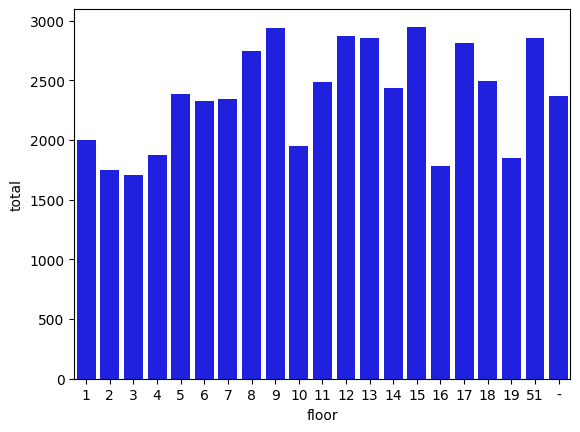

In [65]:
sns.barplot(data= agg_floor_price, x= "floor", y= "total", color= "blue");

In [66]:
sixteenth_floor = aluguel_casa.query("floor == 16")
sixteenth_floor.head()

,index,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
1843,1843,Porto,100,2,1,0,16,accept,not furnished,550,900.0,61.0,12.0,1523.0
5175,5175,Porto,72,2,1,2,16,accept,not furnished,730,1200.0,89.0,16.0,2035.0
